# Prediction of El-Nino Events

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('./data/raw/elnino.csv')
print(df.shape)

(178080, 12)


In [3]:
print(df.head())

   Observation   Year   Month   Day    Date   Latitude   Longitude  \
0            1     80       3     7  800307      -0.02     -109.46   
1            2     80       3     8  800308      -0.02     -109.46   
2            3     80       3     9  800309      -0.02     -109.46   
3            4     80       3    10  800310      -0.02     -109.46   
4            5     80       3    11  800311      -0.02     -109.46   

   Zonal Winds  Meridional Winds  Humidity  Air Temp  Sea Surface Temp  
0         -6.8               0.7         .     26.14             26.24  
1         -4.9               1.1         .     25.66             25.97  
2         -4.5               2.2         .     25.69             25.28  
3         -3.8               1.9         .     25.57             24.31  
4         -4.2               1.5         .      25.3             23.19  


In [4]:
print(df.describe())

         Observation           Year          Month            Day  \
count  178080.000000  178080.000000  178080.000000  178080.000000   
mean    89040.500000      93.302325       6.504869      15.720536   
std     51407.412306       3.393818       3.459657       8.800487   
min         1.000000      80.000000       1.000000       1.000000   
25%     44520.750000      92.000000       4.000000       8.000000   
50%     89040.500000      94.000000       6.000000      16.000000   
75%    133560.250000      96.000000      10.000000      23.000000   
max    178080.000000      98.000000      12.000000      31.000000   

                Date       Latitude      Longitude  
count  178080.000000  178080.000000  178080.000000  
mean   933689.455374       0.473626     -54.025233  
std     33900.474320       4.583041     135.363994  
min    800307.000000      -8.810000    -180.000000  
25%    920116.000000      -2.010000    -154.950000  
50%    940601.000000       0.010000    -111.260000  
75%    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Observation        178080 non-null  int64  
 1    Year              178080 non-null  int64  
 2    Month             178080 non-null  int64  
 3    Day               178080 non-null  int64  
 4    Date              178080 non-null  int64  
 5    Latitude          178080 non-null  float64
 6    Longitude         178080 non-null  float64
 7    Zonal Winds       178080 non-null  object 
 8    Meridional Winds  178080 non-null  object 
 9    Humidity          178080 non-null  object 
 10   Air Temp          178080 non-null  object 
 11   Sea Surface Temp  178080 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 16.3+ MB


In [6]:
print(df.isnull().sum())

Observation          0
 Year                0
 Month               0
 Day                 0
 Date                0
 Latitude            0
 Longitude           0
 Zonal Winds         0
 Meridional Winds    0
 Humidity            0
 Air Temp            0
 Sea Surface Temp    0
dtype: int64


In [7]:
print(df.columns)

Index(['Observation', ' Year', ' Month', ' Day', ' Date', ' Latitude',
       ' Longitude', ' Zonal Winds', ' Meridional Winds', ' Humidity',
       ' Air Temp', ' Sea Surface Temp'],
      dtype='object')


In [8]:
cols = [' Zonal Winds', ' Meridional Winds', ' Humidity', ' Air Temp', ' Sea Surface Temp']
for col in cols:
    print(f'{col}: Value: {df[col].value_counts().index[0]} ; counts: {df[col].value_counts().iloc[0]}')

 Zonal Winds: Value: . ; counts: 25163
 Meridional Winds: Value: . ; counts: 25162
 Humidity: Value: . ; counts: 65761
 Air Temp: Value: . ; counts: 18237
 Sea Surface Temp: Value: . ; counts: 17007


In [9]:
df.columns = df.columns.str.strip()

In [10]:
df.replace('.', np.nan, inplace=True)

In [11]:
cols = [col.strip() for col in cols]
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [12]:
print(df.isnull().sum())

Observation             0
Year                    0
Month                   0
Day                     0
Date                    0
Latitude                0
Longitude               0
Zonal Winds         25163
Meridional Winds    25162
Humidity            65761
Air Temp            18237
Sea Surface Temp    17007
dtype: int64


In [13]:
df['Year'] = df['Year'].apply(lambda x: int(f'19{x:02d}'))
print(df.Year.tail())

178075    1998
178076    1998
178077    1998
178078    1998
178079    1998
Name: Year, dtype: int64


In [14]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], format="%Y%m%d")

In [15]:
df.set_index('Date', inplace=True)

In [16]:
df.drop(['Observation', 'Year', 'Month', 'Day', 'Zonal Winds',
 'Meridional Winds', 'Humidity', 'Air Temp'], axis=1, inplace=True)

In [17]:
print(df.head())

            Latitude  Longitude  Sea Surface Temp
Date                                             
1980-03-07     -0.02    -109.46             26.24
1980-03-08     -0.02    -109.46             25.97
1980-03-09     -0.02    -109.46             25.28
1980-03-10     -0.02    -109.46             24.31
1980-03-11     -0.02    -109.46             23.19


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178080 entries, 1980-03-07 to 1998-06-15
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Latitude          178080 non-null  float64
 1   Longitude         178080 non-null  float64
 2   Sea Surface Temp  161073 non-null  float64
dtypes: float64(3)
memory usage: 5.4 MB
None


In [19]:
print(df['Latitude'].agg(['count', 'min', 'mean','max']))
print(df['Longitude'].agg(['count', 'min', 'mean','max']))

count    178080.000000
min          -8.810000
mean          0.473626
max           9.050000
Name: Latitude, dtype: float64
count    178080.000000
min        -180.000000
mean        -54.025233
max         171.080000
Name: Longitude, dtype: float64


In [20]:
# Filter Niño 3 and 3.4 region
df_nino34 = df[
    (df['Latitude'] >= -5) & (df['Latitude'] <= 5) &
    (df['Longitude'] >= -170) & (df['Longitude'] <= -120)
]

df_nino3 = df[
    (df['Latitude'] >= -5) & (df['Latitude'] <= 5) &
    (df['Longitude'] >= -150) & (df['Longitude'] <= -90)
]

In [21]:
# Group and aggregate
df_nino34 = df_nino34.groupby(df_nino34.index)['Sea Surface Temp'].mean().to_frame(name='nino34')
df_nino3 = df_nino3.groupby(df_nino3.index)['Sea Surface Temp'].mean().to_frame(name='nino3')

In [22]:
# 3. Sort by datetime and handle missing
df_nino34 = df_nino34.sort_index().interpolate().ffill().bfill()
df_nino3 = df_nino3.sort_index().interpolate().ffill().bfill()

In [23]:
print(len(df_nino34), len(df_nino3))

5369 6368


In [71]:
df_nino = pd.merge(df_nino3, df_nino34, how='outer', left_index=True, right_index=True)

In [56]:
df_nino['nino3'] = df_nino['nino3'].ffill()
df_nino['nino34'] = df_nino['nino34'].ffill().bfill()

In [73]:
df_nino = round(df_nino, 2)

In [74]:
df_nino

,nino3,nino34
Date,,
1980-03-07,26.24,NaN
1980-03-08,25.97,NaN
1980-03-09,25.28,NaN
1980-03-10,24.31,NaN
1980-03-11,23.19,NaN
...,...,...
1998-06-18,25.93,27.18
1998-06-19,25.91,27.11
1998-06-20,27.40,28.43


In [75]:
print(df_nino.isnull().sum())

nino3        2
nino34    1001
dtype: int64


In [76]:
# df_nino['nino_3_lag_1'] = t_df['nino3'].shift(1)
# df_nino['nino_3_lag_7'] = t_df['nino3'].shift(7)
# df_nino['nino_3_lag_30'] = t_df['nino3'].shift(30)

In [84]:
df_nino['nino34_lag_1'] = df_nino['nino34'].shift(1)
df_nino['nino34_lag_7'] = df_nino['nino34'].shift(7)
df_nino['nino34_lag_30'] = df_nino['nino34'].shift(30)

In [85]:
# 7-day, 30-day rolling stats
df_nino['nino34_roll_mean_7'] = df_nino['nino34'].rolling(window=7).mean()
df_nino['nino34_roll_std_7'] = df_nino['nino34'].rolling(window=7).std()

df_nino['nino34_roll_mean_30'] = df_nino['nino34'].rolling(window=30).mean()
df_nino['nino34_roll_std_30'] = df_nino['nino34'].rolling(window=30).std()

In [86]:
# Change in SST compared to previous day
df_nino['nino34_diff_1'] = df_nino['nino34'].diff(1)
df_nino['nino34_diff_7'] = df_nino['nino34'].diff(7)

In [87]:
# Extract temporal components
df_nino['month'] = df_nino.index.month
df_nino['day_of_week'] = df_nino.index.dayofweek
df_nino['is_weekend'] = df_nino.index.dayofweek >= 5

In [88]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

df_nino['season'] = df_nino['month'].apply(get_season)

In [89]:
# Placeholder logic: anomaly if nino 3.4 SST deviation from long-term mean > threshold
long_term_mean = df_nino['nino34'].mean()
long_term_std = df_nino['nino34'].std()

df_nino['nino34_anomaly'] = df_nino['nino34'] - long_term_mean
df_nino['is_elnino'] = (df_nino['nino34_anomaly'] > (1.5 * long_term_std)).astype(int)

In [103]:
df_nino

,nino3,nino34,nino34_lag_1,nino34_lag_7,nino34_lag_30,nino34_roll_mean_7,nino34_roll_std_7,nino34_roll_mean_30,nino34_roll_std_30,nino34_diff_1,nino34_diff_7,month,day_of_week,is_weekend,season,nino34_anomaly,is_elnino
Date,,,,,,,,,,,,,,,,,
1980-03-07,26.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,False,spring,NaN,0
1980-03-08,25.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,True,spring,NaN,0
1980-03-09,25.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,6,True,spring,NaN,0
1980-03-10,24.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,False,spring,NaN,0
1980-03-11,23.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,False,spring,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-06-18,25.93,27.18,27.47,26.67,28.31,27.187143,0.273966,27.295000,0.492396,-0.29,0.51,6,3,False,summer,0.721285,0
1998-06-19,25.91,27.11,27.18,26.69,28.24,27.247143,0.175092,27.257333,0.459752,-0.07,0.42,6,4,False,summer,0.651285,0
1998-06-20,27.40,28.43,27.11,27.00,28.08,27.451429,0.452748,27.269000,0.485090,1.32,1.43,6,5,True,summer,1.971285,0


ValueError: Date
1980-03-07    NaN
1980-03-08    NaN
1980-03-09    NaN
1980-03-10    NaN
1980-03-11    NaN
             ... 
1998-06-18    NaN
1998-06-19    NaN
1998-06-20    NaN
1998-06-21    NaN
1998-06-22    NaN
Name: is_elnino, Length: 6370, dtype: object is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

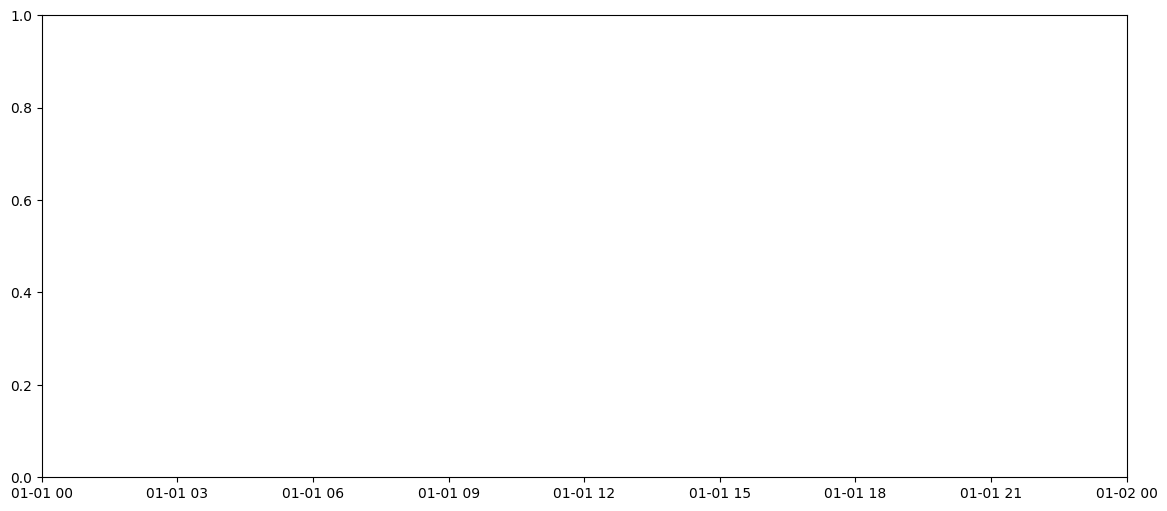

In [104]:
colors = {True: 'red', False: 'blue'}
plt.figure(figsize=(14, 6))
plt.plot(df_nino.index, df_nino['nino34'], color=df_nino['is_elnino'].map(colors))
plt.title('Niño 3.4 SST Anomalies Over Time')
plt.ylabel('Anomaly (°C)')
plt.xlabel('Date')
plt.axhline(0.5, color='red', linestyle='--')
plt.axhline(-0.5, color='blue', linestyle='--')
plt.tight_layout()
plt.show()